In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-07-13 18:18:19.539281: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 18:18:19.539381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 18:18:19.671990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


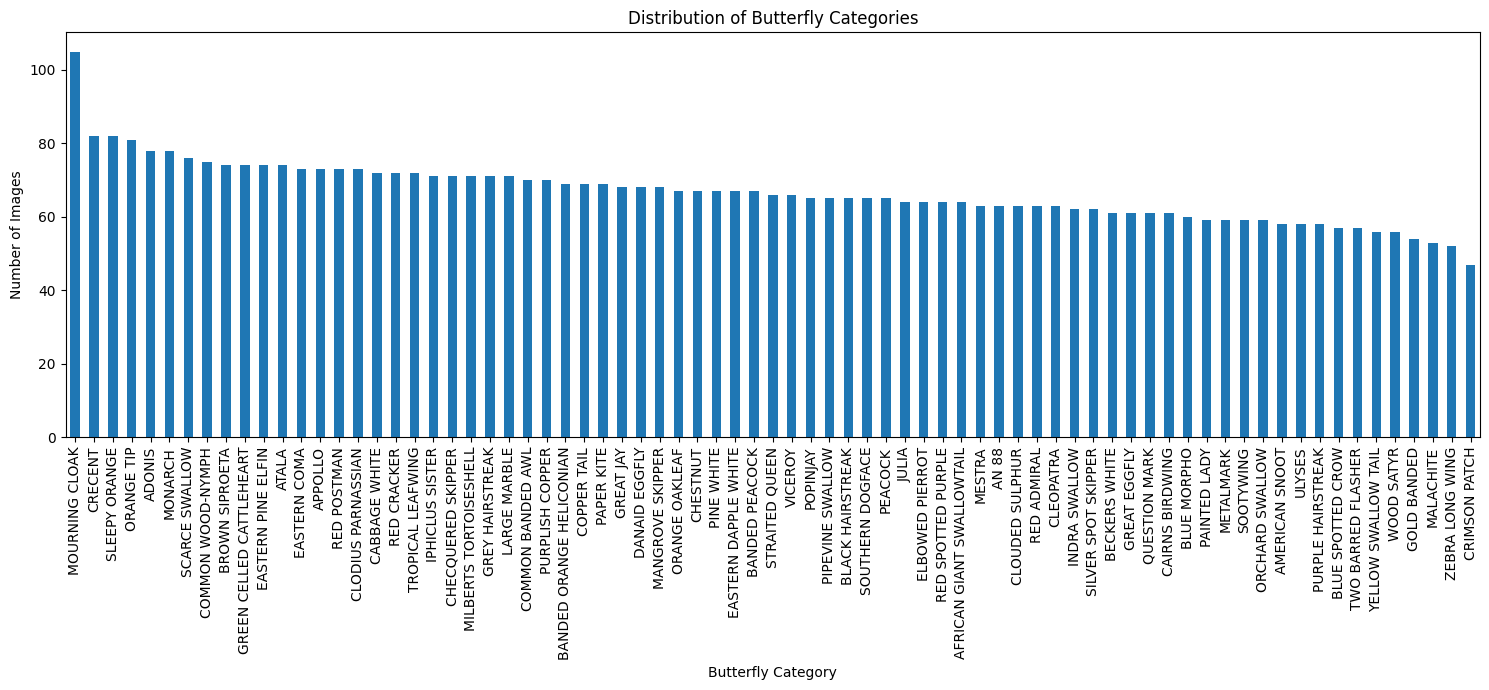

Preprocess Image: 100%|██████████| 5000/5000 [00:50<00:00, 99.63it/s] 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 111, 111,  │        128 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 111, 111,  │        352 │ activation[0][0]  │
│ (Conv2D)            │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 111, 111,  │         44 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 111, 111,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 115, 115,  │          0 │ activation_1[0][… │
│ (ZeroPadding2D)     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 117, 117,  │          0 │ activation_3[0][… │
│ (ZeroPadding2D)     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │        396 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      1,920 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 56, 56,    │        396 │ activation_2[0][

 Total params: 17,535,711 (66.89 MB)

 Trainable params: 14,215,867 (54.23 MB)

 Non-trainable params: 3,319,844 (12.66 MB)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/109 ━━━━━━━━━━━━━━━━━━━━ 1:40:39 56s/step - accuracy: 0.0000e+00 - loss: 10.6062

I0000 00:00:1720894830.153980     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 140s 777ms/step - accuracy: 0.0780 - loss: 8.8907 - val_accuracy: 0.2067 - val_loss: 6.5055 - learning_rate: 1.0000e-04
Epoch 2/50
  1/109 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2812 - loss: 6.6282

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.2812 - loss: 6.6282 - val_accuracy: 0.2053 - val_loss: 6.4955 - learning_rate: 1.0000e-04
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 328ms/step - accuracy: 0.2744 - loss: 6.1244 - val_accuracy: 0.3613 - val_loss: 5.1320 - learning_rate: 1.0000e-04
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3438 - loss: 5.2936 - val_accuracy: 0.3747 - val_loss: 5.0703 - learning_rate: 1.0000e-04
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.4958 - loss: 4.5749 - val_accuracy: 0.4573 - val_loss: 4.3297 - learning_rate: 1.0000e-04
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6250 - loss: 3.9425 - val_accuracy: 0.4627 - val_loss: 4.3429 - learning_rate: 1.0000e-04
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 329ms/step - accuracy: 0.6116 - loss: 3.6525 - val_accuracy: 0.4747 - val_loss: 3.9035 - learning_rate: 1.0000e-04
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Path dataset
train_csv = "/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/Training_set.csv"
train_folder = "/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/train/train"
test_folder = "/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/test/test"

# Result path
result_path = "run/"
os.makedirs(result_path, exist_ok=True)
train_df = pd.read_csv(train_csv)

plt.figure(figsize=(15, 7))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Butterfly Categories')
plt.xlabel('Butterfly Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Hyperparameters
image_size = (224, 224)
batch_size = 32
epochs = 50
learning_rate = 0.0001

class_names = list(set(train_df['label']))

# Preprocessing and data splitting
features = []
labels = []

for image in tqdm(os.listdir(train_folder), desc="Preprocess Image"):
    label_name = train_df.loc[train_df['filename'] == image, 'label'].values[0]
    image_read = cv2.imread(os.path.join(train_folder, image))
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    features.append(image_normalized)
    label = class_names.index(label_name)
    labels.append(label)

features = np.asarray(features)
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle=True, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load NASNetMobile base model without top layers
weights_path = '/kaggle/input/nasnet-00x/NASNet-mobile-no-top.h5'
base_model = NASNetMobile(
    weights=None,
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.load_weights(weights_path)

# Freeze layers
num_layers_to_train = int(np.ceil(0.1 * len(base_model.layers)))
for layer in base_model.layers[:-num_layers_to_train]:
    layer.trainable = False

# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create complete model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile model
model.compile(optimizer=Adam(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint_path = os.path.join(result_path, "best_model.keras")
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=False)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Training
start_time = time.time()

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[model_checkpoint, early_stopping, reduce_lr],
    steps_per_epoch=len(X_train) // batch_size
)

end_time = time.time()
print("Training Time:", end_time - start_time)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


2024-07-11 11:15:39.316172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-07-11 11:15:39.316282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-07-11 11:15:39.456029: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


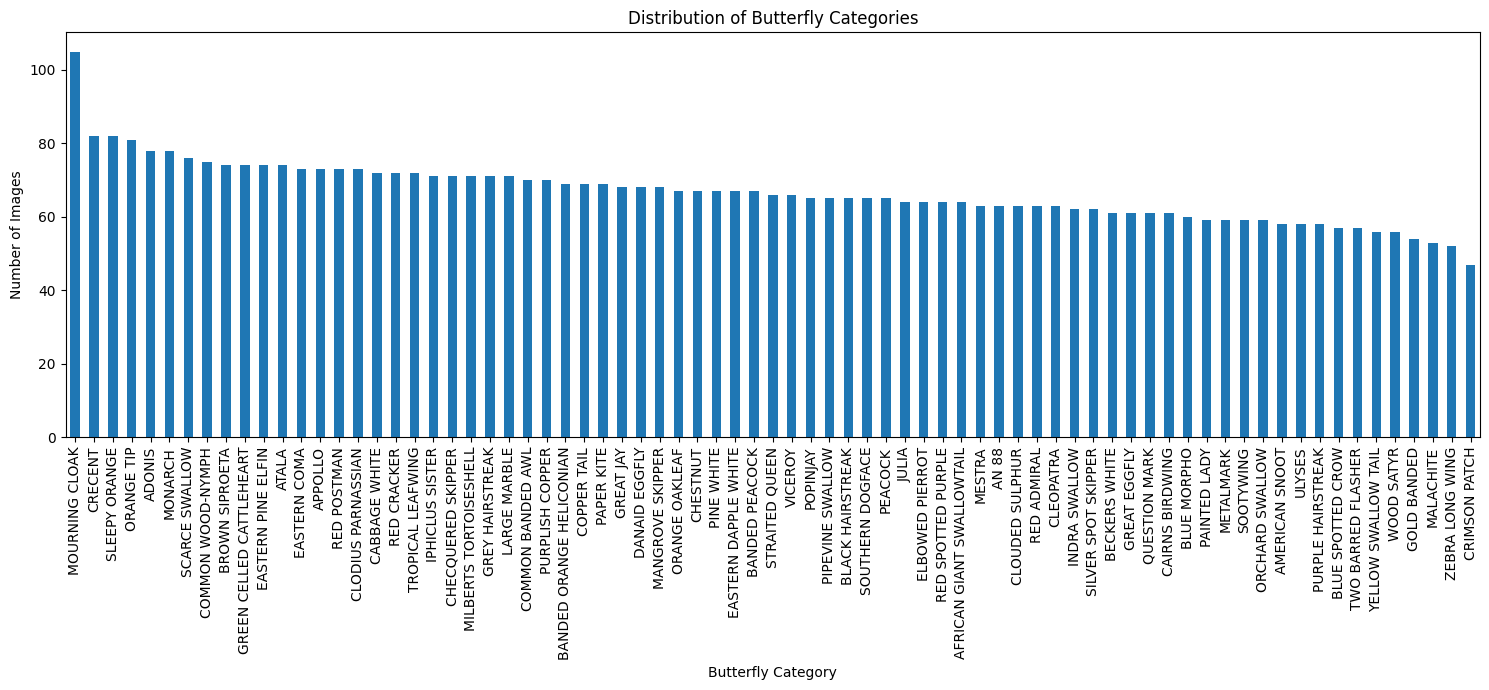

In [3]:
# Path dataset
train_csv = "/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/Training_set.csv"
train_folder = "/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/train/train"
test_folder = "/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/test/test"

# Result path
result_path = "run/"
os.makedirs(result_path, exist_ok=True)
train_df = pd.read_csv(train_csv)

plt.figure(figsize=(15, 7))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Butterfly Categories')
plt.xlabel('Butterfly Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [4]:
## Hyperparameter
image_size = (224, 224)
batch_size = 32
epochs = 50
learning_rate = 0.0001

class_name = list(set(train_df['label']))

features = []
labels = []

for image in tqdm(os.listdir(train_folder), desc="Preprocess Image"):
    label_name = train_df.loc[train_df['filename'] == image, 'label'].values[0]
    image_read = cv2.imread(os.path.join(train_folder, image))
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    features.append(image_normalized)
    label = class_name.index(label_name)
    labels.append(label)

features = np.asarray(features)
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle=True, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=42)


Preprocess Image: 100%|██████████| 5000/5000 [00:50<00:00, 98.72it/s] 


In [5]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)


In [6]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Đường dẫn đến tệp trọng số
weights_path = '/kaggle/input/nasnet-00x/NASNet-mobile-no-top.h5'

# Khởi tạo mô hình NASNetMobile mà không có trọng số
base_model = NASNetMobile(
    weights=None, 
    include_top=False, 
    input_shape=(224, 224, 3)
)

# Tải trọng số vào mô hình
base_model.load_weights(weights_path)

# Freeze layer
num_layers_to_train = int(np.ceil(0.1 * len(base_model.layers)))

for layer in base_model.layers[:-num_layers_to_train]:
    layer.trainable = False

# Thêm các lớp mới vào mô hình
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
predictions = Dense(75, activation='softmax')(x)

# Tạo mô hình hoàn chỉnh
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

model.compile(optimizer=Adam(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 111, 111,  │        128 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 111, 111,  │        352 │ activation[0][0]  │
│ (Conv2D)            │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 111, 111,  │         44 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 111, 111,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 115, 115,  │          0 │ activation_1[0][… │
│ (ZeroPadding2D)     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 117, 117,  │          0 │ activation_3[0][… │
│ (ZeroPadding2D)     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │        396 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      1,920 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 56, 56,    │        396 │ activation_2[0][

 Total params: 17,535,711 (66.89 MB)

 Trainable params: 14,215,867 (54.23 MB)

 Non-trainable params: 3,319,844 (12.66 MB)

In [8]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint_path = os.path.join(result_path, "best_model.keras")
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=False)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


In [9]:
# Training
start_time = time.time()

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[model_checkpoint, early_stopping, reduce_lr],
    steps_per_epoch=len(X_train) // batch_size
)

end_time = time.time()

print("Training Time", end_time - start_time)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

  self._warn_if_super_not_called()


  1/109 ━━━━━━━━━━━━━━━━━━━━ 1:39:48 55s/step - accuracy: 0.0000e+00 - loss: 10.0051


I0000 00:00:1720696880.215383     144 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 137s 751ms/step - accuracy: 0.0705 - loss: 8.7470 - val_accuracy: 0.1867 - val_loss: 6.5317 - learning_rate: 1.0000e-04

Epoch 2/50

  1/109 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.0938 - loss: 7.1709

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.

  self.gen.throw(typ, value, traceback)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0938 - loss: 7.1709 - val_accuracy: 0.1760 - val_loss: 6.5326 - learning_rate: 1.0000e-04

Epoch 3/50

109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 329ms/step - accuracy: 0.2728 - loss: 6.0686 - val_accuracy: 0.4040 - val_loss: 4.9014 - learning_rate: 1.0000e-04

Epoch 4/50

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4688 - loss: 4.6352 - val_accuracy: 0.4027 - val_loss: 4.9063 - learning_rate: 1.0000e-04

Epoch 5/50

109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 332ms/step - accuracy: 0.5198 - loss: 4.3896 - val_accuracy: 0.5067 - val_loss: 4.1331 - learning_rate: 1.0000e-04

Epoch 6/50

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5000 - loss: 4.2196 - val_accuracy: 0.5027 - val_loss: 4.1373 - learning_rate: 1.0000e-04

Epoch 7/50

109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 329ms/step - accuracy: 0.6389 - loss: 3.5052 - val_accuracy: 0.5947 - val_loss: 3.4626 - learning_rate: 1.0000e-04

Epoch 8/50

109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/ste

In [10]:
# Load the best model
model.load_weights(checkpoint_path)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8134 - loss: 1.2604

Test Accuracy: 80.00%


In [11]:
# Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_name))

# Save test predictions to CSV
test_filenames = [os.path.basename(filepath) for filepath in os.listdir(test_folder)]
test_df = pd.DataFrame({'filename': test_filenames, 'predicted_label': y_pred_classes})
output_csv_path = os.path.join(result_path, "test_predictions.csv")
test_df.to_csv(output_csv_path, index=False)
print(f"Test predictions saved to {output_csv_path}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 608ms/step

                           precision    recall  f1-score   support



        BLUE SPOTTED CROW       0.69      0.75      0.72        12

                 POPINJAY       0.86      0.86      0.86         7

            CRIMSON PATCH       0.86      1.00      0.92         6

          ZEBRA LONG WING       0.93      1.00      0.96        13

            INDRA SWALLOW       0.80      0.73      0.76        11

          CAIRNS BIRDWING       0.70      0.64      0.67        11

           BANDED PEACOCK       0.88      0.70      0.78        10

                GREAT JAY       0.69      0.82      0.75        11

              BLUE MORPHO       0.73      0.62      0.67        13

           ORANGE OAKLEAF       0.89      0.80      0.84        10

                METALMARK       0.83      1.00      0.91         5

                  CRECENT       0.91      0.83      0.87        12

              RED CRACKER       0.88      1.00      0.93         7

 BA

ValueError: All arrays must be of the same length

In [12]:
# Preprocess test images
test_features = []
test_filenames = []

for image in tqdm(os.listdir(test_folder), desc="Preprocess Test Image"):
    image_read = cv2.imread(os.path.join(test_folder, image))
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    test_features.append(image_normalized)
    test_filenames.append(image)

test_features = np.asarray(test_features)

# Make predictions
y_pred = model.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)

# Save test predictions to CSV
test_filenames = [os.path.basename(filepath) for filepath in os.listdir(test_folder)]
test_df = pd.DataFrame({'filename': test_filenames, 'predicted_label': y_pred_classes})
output_csv_path = os.path.join(result_path, "test_predictions.csv")
test_df.to_csv(output_csv_path, index=False)
print(f"Test predictions saved to {output_csv_path}")


Preprocess Test Image: 100%|██████████| 1499/1499 [00:13<00:00, 113.32it/s]


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step

Test predictions saved to run/test_predictions.csv


In [13]:
import os

# Check the contents of the result directory to confirm the model file is saved
print("Contents of the result directory:")
print(os.listdir(result_path))


Contents of the result directory:

['best_model.keras', 'test_predictions.csv']


In [14]:
import os

# List the contents of the result directory to confirm the model file is saved
print("Contents of the result directory:")
print(os.listdir(result_path))


Contents of the result directory:

['best_model.keras', 'test_predictions.csv']


In [16]:
# Preprocess test images
test_features = []
test_filenames = []

for image in tqdm(os.listdir(test_folder), desc="Preprocess Test Image"):
    image_read = cv2.imread(os.path.join(test_folder, image))
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    test_features.append(image_normalized)
    test_filenames.append(image)

test_features = np.asarray(test_features)

# Make predictions
y_pred = model.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)

# Save test predictions to CSV with the required format
test_df = pd.DataFrame({'ID': test_filenames, 'label': y_pred_classes})
output_csv_path = os.path.join(result_path, "test_predictions.csv")
test_df.to_csv(output_csv_path, index=False)
print(f"Test predictions saved to {output_csv_path}")

# Check the contents of the result directory to confirm the CSV file is saved
print("Contents of the result directory:")
print(os.listdir(result_path))

# Create a link to download the file
from IPython.display import FileLink
display(FileLink(output_csv_path))


Preprocess Test Image: 100%|██████████| 1499/1499 [00:04<00:00, 369.77it/s]


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step

Test predictions saved to run/test_predictions.csv

Contents of the result directory:

['best_model.keras', 'test_predictions.csv']


/kaggle/working/run/test_predictions.csv

In [17]:
# Make predictions
y_pred = model.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_labels = [class_name[label] for label in y_pred_classes]

# Save test predictions to CSV with the required format
test_df = pd.DataFrame({'ID': test_filenames, 'label': predicted_labels})
output_csv_path = os.path.join(result_path, "test_predictions.csv")
test_df.to_csv(output_csv_path, index=False)
print(f"Test predictions saved to {output_csv_path}")

# Check the contents of the result directory to confirm the CSV file is saved
print("Contents of the result directory:")
print(os.listdir(result_path))

# Create a link to download the file
from IPython.display import FileLink
display(FileLink(output_csv_path))


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step

Test predictions saved to run/test_predictions.csv

Contents of the result directory:

['best_model.keras', 'test_predictions.csv']


/kaggle/working/run/test_predictions.csv